<a href="https://colab.research.google.com/github/JuanFerTgB/Ritz-Funcional-Euler-Bernoulli/blob/main/Metodo_de_Ritz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

init_printing()




In [290]:
 #Configuracion graficos
gris = '#757575'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["text.color"] = gris
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.color"] = gris
plt.rcParams["ytick.color"] = gris
plt.rcParams["axes.labelcolor"] = gris
plt.rcParams["axes.edgecolor"] = gris
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False


In [291]:
EI=symbols('EI')
x = symbols('x')
L = symbols('L')
q= pi**4 *sin(pi*x)

u_e = sin(pi * x)





In [292]:
def plot_expr(expr, x, titulo, rango=(0, 1), ax=None, linestyle="solid"):
    """Grafica expresiones de SymPy que dependen de una variable"""
    expr_num = lambdify(x, expr, "numpy")
    x_num = np.linspace(rango[0], rango[1], 301)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.plot(x_num, expr_num(x_num), linestyle=linestyle)
    ax.set_title(titulo)


In [302]:
def funcion_base(x, k):
    """Elemento k de la base"""
    return x*(x-1)*x**k


def funcion_aprox(x, num):

    c = symbols('c0:%d'%num)
    u_n = sum([c[k]*funcion_base(x, k) for k in range(num)])
    return u_n, c


def funcional(u, x):
    """Residual para el problema de interés"""
    return integrate((1/2)*(diff(u, x, 2))**2 - q*u, (x, 0, 1))




nterms = 3


In [303]:
u, c = funcion_aprox(x, nterms)
u


                   2               3        
c₀⋅x⋅(x - 1) + c₁⋅x ⋅(x - 1) + c₂⋅x ⋅(x - 1)

In [304]:
J = expand(funcional(u, x))
factor(J)

     ⎛                       2                                                
48.0⋅⎝0.0416666666666667⋅π⋅c₀  + 0.0416666666666667⋅π⋅c₀⋅c₁ + 0.04166666666666
──────────────────────────────────────────────────────────────────────────────
                                                                              

                                 2                             2              
67⋅π⋅c₀⋅c₂ + 0.0833333333333333⋅π ⋅c₀ + 0.0416666666666667⋅π⋅c₁  + 0.083333333
──────────────────────────────────────────────────────────────────────────────
                                     π                                        

                                      2               2               2   ⎞
3333333⋅π⋅c₁⋅c₂ + 0.0416666666666667⋅π ⋅c₁ + 0.05⋅π⋅c₂  - c₂ + 0.125⋅π ⋅c₂⎠
───────────────────────────────────────────────────────────────────────────
                                                                           

In [305]:
eqs1 = Matrix([funcional(u, x)])
eqs1

⎡      2                                 2                     2    4 ⎛2⋅c₀   
⎢2.0⋅c₀  + 2.0⋅c₀⋅c₁ + 2.0⋅c₀⋅c₂ + 2.0⋅c₁  + 4.0⋅c₁⋅c₂ + 2.4⋅c₂  + π ⋅⎜──── - 
⎢                                                                     ⎜  3    
⎣                                                                     ⎝ π     

2⋅c₁   24⋅c₂⎞    4 ⎛  2⋅c₀   4⋅c₁   6⋅c₂   24⋅c₂⎞⎤
──── - ─────⎟ - π ⋅⎜- ──── - ──── - ──── + ─────⎟⎥
  3       5 ⎟      ⎜    3      3      3       5 ⎟⎥
 π       π  ⎠      ⎝   π      π      π       π  ⎠⎦

In [306]:
eqs = Matrix([funcional(u, x)]).jacobian(c)
eqs


⎡                                                                             
⎢4.0⋅c₀ + 2.0⋅c₁ + 2.0⋅c₂ + 4⋅π  2.0⋅c₀ + 4.0⋅c₁ + 4.0⋅c₂ + 2⋅π  2.0⋅c₀ + 4.0⋅
⎢                                                                             
⎣                                                                             

              24    4 ⎛  6    24⎞⎤
c₁ + 4.8⋅c₂ - ── - π ⋅⎜- ── + ──⎟⎥
              π       ⎜   3    5⎟⎥
                      ⎝  π    π ⎠⎦

In [307]:
sol = solve(eqs, c)
sol


{c₀: -3.14159265358979, c₁: -3.39062990307847, c₂: 3.39062990307847}

In [308]:
u.subs(sol)

                  3                             2                             
3.39062990307847⋅x ⋅(x - 1) - 3.39062990307847⋅x ⋅(x - 1) - 3.14159265358979⋅x

        
⋅(x - 1)

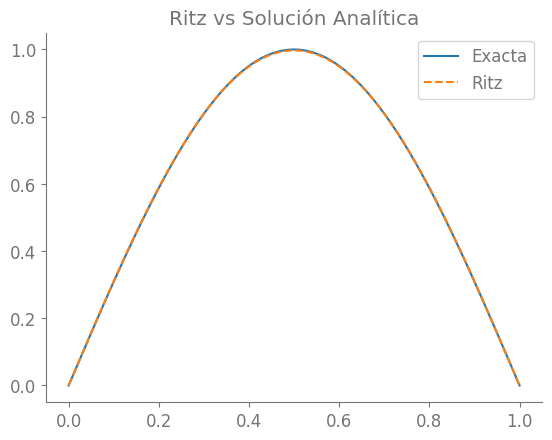

In [309]:
plt.figure()
ax = plt.gca()
plot_expr(u_e, x, "Ritz vs Solución Analítica", ax=ax)
plot_expr(u.subs(sol), x, "Ritz vs Solución Analítica", ax=ax, linestyle="dashed")
plt.legend(["Exacta", "Ritz"])
plt.show()

In [ ]:
err = integrate((u_e - u.subs(sol))**2, (x, 0, 1))/integrate(u_e**2, (x, 0, 1))

In [ ]:
N(sqrt(err)*100)